# User-Generated Content Analysis - Malta

This is an analysis of User-Generated Content on Sustainable Fashion from Instagram. 


**Research Hypothesis**:
User-Generated Content is effective in Sustainable Fashion to increase consumer attraction and engagement.

**Research Questions**:
1. How can UGC foster C2C relationships within the sustainability community?
2. How effective is current UGC in Sustainable Fashion when measured using quantitative analysis techniques?
3. Which guidelines should be followed to create effective UGC in Sustainable Fashion?

## Data Acquisition

In [298]:
# Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib import colors
import plotly.express as px
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
from sklearn.feature_extraction.text import TfidfVectorizer
import statsmodels.api as sm

In [299]:
# Import filtered csv file

df = pd.read_csv("filtered_data_malta.csv")

In [300]:
df.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 290 entries, 0 to 289
Data columns (total 38 columns):
 #   Column                              Non-Null Count  Dtype  
---  ------                              --------------  -----  
 0   id                                  290 non-null    int64  
 1   ownerUsername                       290 non-null    object 
 2   timestamp                           290 non-null    object 
 3   locationName                        270 non-null    object 
 4   caption                             290 non-null    object 
 5   type                                290 non-null    object 
 6   likesCount                          290 non-null    int64  
 7   commentsCount                       290 non-null    int64  
 8   videoViewCount                      105 non-null    float64
 9   videoPlayCount                      105 non-null    float64
 10  videoDuration                       105 non-null    float64
 11  videoUrl                            105 non-n

In [301]:
# Preview data start
df.head()

,id,ownerUsername,timestamp,locationName,caption,type,likesCount,commentsCount,videoViewCount,videoPlayCount,...,hashtags/8,hashtags/9,hashtags/10,hashtags/11,hashtags/12,hashtags/13,hashtags/14,hashtags/15,hashtags/16,user_followersCount
0,3522923886333240203,user1,2024-12-14T14:07:55.000Z,Malta,🐟 \n\n.\n.\n.\n.\n.\n.\n.\n\n#fallstyle #outfi...,Sidecar,-1,114,NaN,NaN,...,pinterestaesthetic,contentcreatormalta,microinfluencer,styleinspo,ootd,NaN,NaN,NaN,NaN,2017
1,3515616726511352970,user1,2024-12-04T12:09:54.000Z,"Valletta, Malta","🌞\n\n.\n.\n.\n.\n.\n.\n.\n.\n\nFall outfit, th...",Sidecar,-1,118,NaN,NaN,...,pinterestoutfit,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2017
2,3504077318599620013,user1,2024-11-18T14:03:09.000Z,"Naples, Italy",🖼️\n\n.\n.\n.\n.\n.\n.\n.\n.\n\nThrifted fashi...,Sidecar,-1,127,NaN,NaN,...,outfitinspiration,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2017
3,3500422427586962100,user1,2024-11-13T13:01:32.000Z,"Naples, Italy","🦂\n\n.\n.\n.\n.\n.\n.\n\nNight out style, even...",Sidecar,-1,169,NaN,NaN,...,pinteresteurope,italyoutfit,styleinspo,NaN,NaN,NaN,NaN,NaN,NaN,2017
4,3502520894870331632,user1,2024-11-16T10:30:49.000Z,"Sorrento, Italy",☮️🫂🌞 the most beautiful day \n\n.\n.\n.\n.\n.\...,Sidecar,-1,159,NaN,NaN,...,outfitinspo,elegantaesthetic,pinterestaesthetic,italianfall,styleinspo,ootd,eurofallstyle,NaN,NaN,2017


In [302]:
# Preview data end
df.tail()

,id,ownerUsername,timestamp,locationName,caption,type,likesCount,commentsCount,videoViewCount,videoPlayCount,...,hashtags/8,hashtags/9,hashtags/10,hashtags/11,hashtags/12,hashtags/13,hashtags/14,hashtags/15,hashtags/16,user_followersCount
285,3192474633272150256,user5,2023-09-15T15:45:13.000Z,"London, United Kingdom",One last time before I get back to being Miss ...,Video,297,15,4664.0,9189.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,9344
286,3171414730504137843,user5,2023-08-17T14:21:58.000Z,Malta,"Coffee dates, thrifted outfits (that costs les...",Sidecar,462,7,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,9344
287,3177890023586448999,user5,2023-08-26T12:47:13.000Z,Sardinia,Casually caught a plane to give a sustainable ...,Sidecar,362,29,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,9344
288,3172119593609204846,user5,2023-08-18T13:42:24.000Z,Malta,Seriously loving documenting my life right now...,Sidecar,-1,9,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,9344
289,3174956529969503710,user5,2023-08-22T11:40:49.000Z,Malta,It’s time again😂🤝🏼 Another run down at what go...,Video,242,14,5393.0,10583.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,9344


In [303]:
df.isnull().sum()

id                                      0
ownerUsername                           0
timestamp                               0
locationName                           20
caption                                 0
type                                    0
likesCount                              0
commentsCount                           0
videoViewCount                        185
videoPlayCount                        185
videoDuration                         185
videoUrl                              185
musicInfo/artist_name                 189
musicInfo/audio_id                    186
musicInfo/should_mute_audio           186
musicInfo/should_mute_audio_reason    286
musicInfo/song_name                   189
musicInfo/uses_original_audio         186
isSponsored                             0
isPinned                              290
hashtags/0                             23
hashtags/1                             23
hashtags/2                             23
hashtags/3                        

## Data Preprocessing and Exploration

In [304]:
df.describe()

,id,likesCount,commentsCount,videoViewCount,videoPlayCount,videoDuration,musicInfo/audio_id,isPinned,user_followersCount
count,2.900000e+02,290.000000,290.000000,105.000000,105.000000,105.000000,1.040000e+02,0.0,290.000000
mean,3.330798e+18,156.431034,51.031034,4179.580952,18649.752381,25.028981,1.150181e+15,NaN,9414.010345
std,1.173699e+17,231.961123,64.227179,4367.247408,26176.341142,21.110608,1.222021e+15,NaN,6862.928010
min,3.037492e+18,-1.000000,0.000000,242.000000,1076.000000,2.866000,0.000000e+00,NaN,0.000000
25%,3.229350e+18,-1.000000,9.000000,2303.000000,7963.000000,9.300000,4.231900e+14,NaN,2017.000000
50%,3.325118e+18,-1.000000,20.000000,3160.000000,12231.000000,17.125000,9.470945e+14,NaN,9344.000000
75%,3.438731e+18,263.750000,85.750000,4479.000000,17871.000000,32.000000,1.353941e+15,NaN,17648.000000
max,3.525696e+18,1705.000000,575.000000,35823.000000,178361.000000,90.000000,9.229406e+15,NaN,17648.000000


In [305]:
df[['likesCount', 'commentsCount', 'user_followersCount', 'videoViewCount']].describe()

,likesCount,commentsCount,user_followersCount,videoViewCount
count,290.000000,290.000000,290.000000,105.000000
mean,156.431034,51.031034,9414.010345,4179.580952
std,231.961123,64.227179,6862.928010,4367.247408
min,-1.000000,0.000000,0.000000,242.000000
25%,-1.000000,9.000000,2017.000000,2303.000000
50%,-1.000000,20.000000,9344.000000,3160.000000
75%,263.750000,85.750000,17648.000000,4479.000000
max,1705.000000,575.000000,17648.000000,35823.000000


In [306]:
# Filter hashtag columns
hashtag_cols = [col for col in df.columns if col.startswith('hashtags/')]

# Combine all hashtags into a single string per row
hashtags = df[hashtag_cols].fillna('').astype(str).agg(' '.join, axis=1)

# add column in df
df['hashtags'] = hashtags

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 290 entries, 0 to 289
Data columns (total 39 columns):
 #   Column                              Non-Null Count  Dtype  
---  ------                              --------------  -----  
 0   id                                  290 non-null    int64  
 1   ownerUsername                       290 non-null    object 
 2   timestamp                           290 non-null    object 
 3   locationName                        270 non-null    object 
 4   caption                             290 non-null    object 
 5   type                                290 non-null    object 
 6   likesCount                          290 non-null    int64  
 7   commentsCount                       290 non-null    int64  
 8   videoViewCount                      105 non-null    float64
 9   videoPlayCount                      105 non-null    float64
 10  videoDuration                       105 non-null    float64
 11  videoUrl                            105 non-n

In [307]:
# Calculate Hashtags Count [From Sun et al. the average is 12 hashtags]
# Identify all the hashtag columns
hashtag_columns = [col for col in df.columns if col.startswith("hashtags/")]

# Count non-null hashtags per row
df['hashtagsCount'] = df[hashtag_columns].notna().sum(axis=1)

In [308]:
# Caption word count
df['captionWordCount'] = df['caption'].apply(lambda x: len(x.split()) if isinstance(x, str) else 0)

In [309]:
df['isSponsored'].unique()

array([False])

In [310]:
# Check if isSponsored or contain words
is_sponsored = (df['isSponsored'] == True) | (df['caption'].str.contains(r'\b(ad|sponsored|collab|PR)\b', case=False, na=False)) # Use regex for word boundary)

# Convert isSponsored to numeric (one-hot encoding)
df['isSponsored_encoded'] = is_sponsored.astype(int)

# check the number of rows after filtering
number_sponsored = is_sponsored.sum()
print("Number of posts identified as sponsored:", number_sponsored)

Number of posts identified as sponsored: 1


C:\Users\snsf1\AppData\Local\Temp\ipykernel_3848\4210770493.py:2: UserWarning: This pattern is interpreted as a regular expression, and has match groups. To actually get the groups, use str.extract.
  is_sponsored = (df['isSponsored'] == True) | (df['caption'].str.contains(r'\b(ad|sponsored|collab|PR)\b', case=False, na=False)) # Use regex for word boundary)


All post in the dataset is not sponsored, after analysisng through relevant keywords on the caption only one contained at least one of the words: ad|sponsored|collab|PR

In [311]:
# Convert type to numeric (one-hot encoding)
df['type_encoded'] = df['type'].astype('category').cat.codes

In [312]:
# Convert song_name that is not null to numeric (one-hot encoding)
df['has_music'] = df['musicInfo/song_name'].notnull().astype(int)

In [313]:
# Uses original audio
df['original_audio'] = df['musicInfo/uses_original_audio'].astype(str).str.lower().map({'true': 1, 'false': 0})
df['original_audio'] = df['original_audio'].fillna(0).astype(int) #No

In [314]:
print(df.columns)

Index(['id', 'ownerUsername', 'timestamp', 'locationName', 'caption', 'type',
       'likesCount', 'commentsCount', 'videoViewCount', 'videoPlayCount',
       'videoDuration', 'videoUrl', 'musicInfo/artist_name',
       'musicInfo/audio_id', 'musicInfo/should_mute_audio',
       'musicInfo/should_mute_audio_reason', 'musicInfo/song_name',
       'musicInfo/uses_original_audio', 'isSponsored', 'isPinned',
       'hashtags/0', 'hashtags/1', 'hashtags/2', 'hashtags/3', 'hashtags/4',
       'hashtags/5', 'hashtags/6', 'hashtags/7', 'hashtags/8', 'hashtags/9',
       'hashtags/10', 'hashtags/11', 'hashtags/12', 'hashtags/13',
       'hashtags/14', 'hashtags/15', 'hashtags/16', 'user_followersCount',
       'hashtags', 'hashtagsCount', 'captionWordCount', 'isSponsored_encoded',
       'type_encoded', 'has_music', 'original_audio'],
      dtype='object')


In [315]:
df_era = df[(df['likesCount'] > 0) & (df['user_followersCount'] > 0)]

# check the number of rows after filtering
print('Number of relevant posts: ', len(df_era))

Number of relevant posts:  110


To calculate engagement rate, engagement metrics and Community size or Impressions are needed. In our data, we only have likes and comments for the engagement metrics, for the latter we can use the profile's follower count or the videoViewCount for the impression, but of course this is only available in Reels / Video format, thus we proceed with the followerCount.

We can also explore and assess relationships between variables individually (e.g. check the averages of likes, comments, followers, views).

likesCount has the value -1 because the post has the number of likes hidden.
Therefore these shall be excluded as well

Some posts are collaborations which means it has multiple posters, or the original poster is not the one that was scraped from therefore the follower count results to 0. These shall be excluded as well.

### Engagement Rate 

formula to calculate engagement rate [Cuevas-Molano et al.]:

**(likes + comments) / followers **

or video views for videos

**(likes + comments) / video views **

In [316]:
# Calculate Engagement Rate (ER) and add column to the df
df_era['engagement_rate'] = (df_era['likesCount'] + df_era['commentsCount']) / df_era['user_followersCount'].replace(0, 1)


C:\Users\snsf1\AppData\Local\Temp\ipykernel_3848\4168577129.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_era['engagement_rate'] = (df_era['likesCount'] + df_era['commentsCount']) / df_era['user_followersCount'].replace(0, 1)


In [317]:
# Engagement Rate by Content Type
avg_er_by_type = df_era.groupby('type')['engagement_rate'].mean()

print("Average engagement rate by content type:", avg_er_by_type)

Average engagement rate by content type: type
Sidecar    0.028380
Video      0.027029
Name: engagement_rate, dtype: float64


In [318]:
df[df['type'] == 'Image']

,id,ownerUsername,timestamp,locationName,caption,type,likesCount,commentsCount,videoViewCount,videoPlayCount,...,hashtags/15,hashtags/16,user_followersCount,hashtags,hashtagsCount,captionWordCount,isSponsored_encoded,type_encoded,has_music,original_audio
165,3357016997168627840,user1,2024-04-29T16:20:32.000Z,"Paris, France",found this pic <3 \n\n.\n.\n.\n.\n.\n.\n.\n.\n...,Image,-1,177,NaN,NaN,...,NaN,NaN,2017,parisianspringoutfit europeanstyle eurosprings...,13,28,0,0,0,0


There is a low count of single images in the data and have likes hidden, which means there are no single images that are eligible to calculate the engagement rate (df['likesCount'] > 0) & (df['user_followersCount'] > 0) that is why it is not in the types.

C:\Users\snsf1\AppData\Local\Temp\ipykernel_3848\954206903.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=avg_er_by_type.index, y=avg_er_by_type.values, palette="viridis")


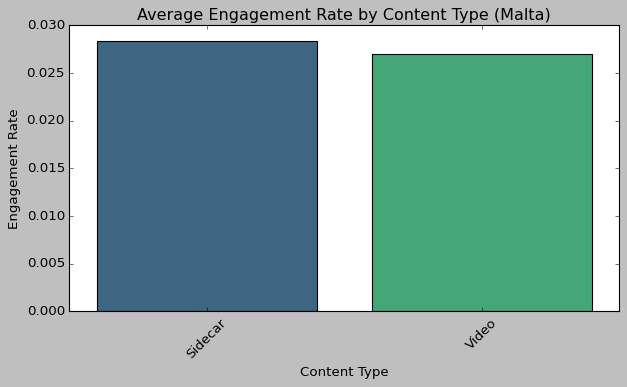

In [319]:
plt.figure(figsize=(8, 5))
sns.barplot(x=avg_er_by_type.index, y=avg_er_by_type.values, palette="viridis")
plt.title('Average Engagement Rate by Content Type (Malta)')
plt.ylabel('Engagement Rate')
plt.xlabel('Content Type')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

C:\Users\snsf1\AppData\Local\Temp\ipykernel_3848\3471929838.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df_era, x='type', y='engagement_rate', palette='viridis')


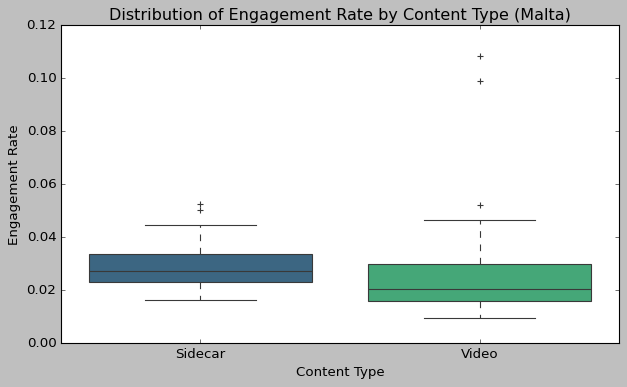

In [320]:
plt.figure(figsize=(8, 5))
sns.boxplot(data=df_era, x='type', y='engagement_rate', palette='viridis')
plt.title('Distribution of Engagement Rate by Content Type (Malta)')
plt.ylabel('Engagement Rate')
plt.xlabel('Content Type')
plt.tight_layout()
plt.show()

As we can see there are outliers in the data with some videos performing a higher engagement rate. We would like to see the engagement rate from the top posts, this is identified by choosing those higher than the average [Ryahen,2019].

In [321]:
df_era['log_engagement_rate'] = np.log1p(df_era['engagement_rate'])

C:\Users\snsf1\AppData\Local\Temp\ipykernel_3848\1954420037.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_era['log_engagement_rate'] = np.log1p(df_era['engagement_rate'])


### Top Posts

In [322]:
avg_er = df_era['log_engagement_rate'].mean()

print("The average engagement rate is: ", avg_er)

The average engagement rate is:  0.027395957374395128


In [323]:
top_df = df_era[df_era['log_engagement_rate'] >= avg_er]

print('Number of posts with average or higher engagament rate: ', len(top_df))

Number of posts with average or higher engagament rate:  43


In [324]:
print("Top Posts Mean Metrics:\n", top_df[['likesCount', 'commentsCount', 'user_followersCount', 'log_engagement_rate']].mean())


Top Posts Mean Metrics:
 likesCount               446.651163
commentsCount             25.906977
user_followersCount    11923.860465
log_engagement_rate        0.038278
dtype: float64


In [325]:
avg_er_by_type_top = top_df.groupby('type')['log_engagement_rate'].mean()

print("Average engagement rate of top posts by content type:", avg_er_by_type_top)


Average engagement rate of top posts by content type: type
Sidecar    0.034070
Video      0.050519
Name: log_engagement_rate, dtype: float64


C:\Users\snsf1\AppData\Local\Temp\ipykernel_3848\3078798823.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=avg_er_by_type_top.index, y=avg_er_by_type_top.values, palette="viridis")


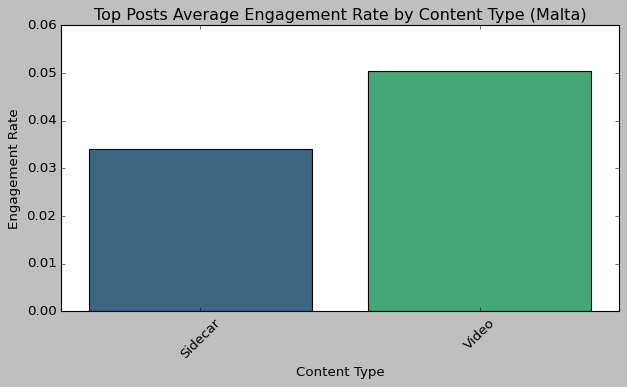

In [326]:
plt.figure(figsize=(8, 5))
sns.barplot(x=avg_er_by_type_top.index, y=avg_er_by_type_top.values, palette="viridis")
plt.title('Top Posts Average Engagement Rate by Content Type (Malta)')
plt.ylabel('Engagement Rate')
plt.xlabel('Content Type')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

### Averages

The average metrics are also calculated so we can have more comparisons in the data.
[Ryahen,2019; Sun et al. 2022; De Oliveira, 2020]

In [327]:
avg_likes = df_era['likesCount'].mean()

print("The average likes count is: ", avg_likes)

The average likes count is:  329.6636363636364


In [328]:
avg_comments= df_era['commentsCount'].mean()

print("The average comments count is: ", avg_comments)


The average comments count is:  19.336363636363636


In [329]:
avg_followers = df_era['user_followersCount'].mean()

print("The average followers count is: ", avg_followers)


The average followers count is:  12754.018181818183


In [330]:
avg_likes_top = top_df['likesCount'].mean()

print("The average likes count of top posts is: ", avg_likes_top)

The average likes count of top posts is:  446.6511627906977


In [331]:
avg_comments_top = top_df['commentsCount'].mean()

print("The average comments count of top posts is: ", avg_comments_top)

The average comments count of top posts is:  25.906976744186046


In [332]:
avg_followers_top = top_df['user_followersCount'].mean()

print("The average followers count of top posts is: ", avg_followers_top )

The average followers count of top posts is:  11923.860465116279


In [333]:
avg_er = df_era['log_engagement_rate'].mean()

print("The average engagement rate is: ", avg_er)

The average engagement rate is:  0.027395957374395128


In [334]:
avg_er_top = top_df['log_engagement_rate'].mean()

print("The average engagement rate of top posts is: ", avg_er_top)

The average engagement rate of top posts is:  0.03827824049646494


In [335]:
avgs_by_type = df_era.groupby('type')[['likesCount', 'commentsCount', 'user_followersCount','log_engagement_rate']].mean()

avgs_by_type

,likesCount,commentsCount,user_followersCount,log_engagement_rate
type,,,,
Sidecar,325.897059,20.102941,12519.058824,0.027957
Video,335.761905,18.095238,13134.428571,0.026487


In [336]:
avgs_by_type_top = top_df.groupby('type')[['likesCount', 'commentsCount', 'user_followersCount', 'log_engagement_rate']].mean()

avgs_by_type_top

,likesCount,commentsCount,user_followersCount,log_engagement_rate
type,,,,
Sidecar,369.812500,25.062500,11420.000000,0.034070
Video,670.181818,28.363636,13389.636364,0.050519


### Data Visualisation

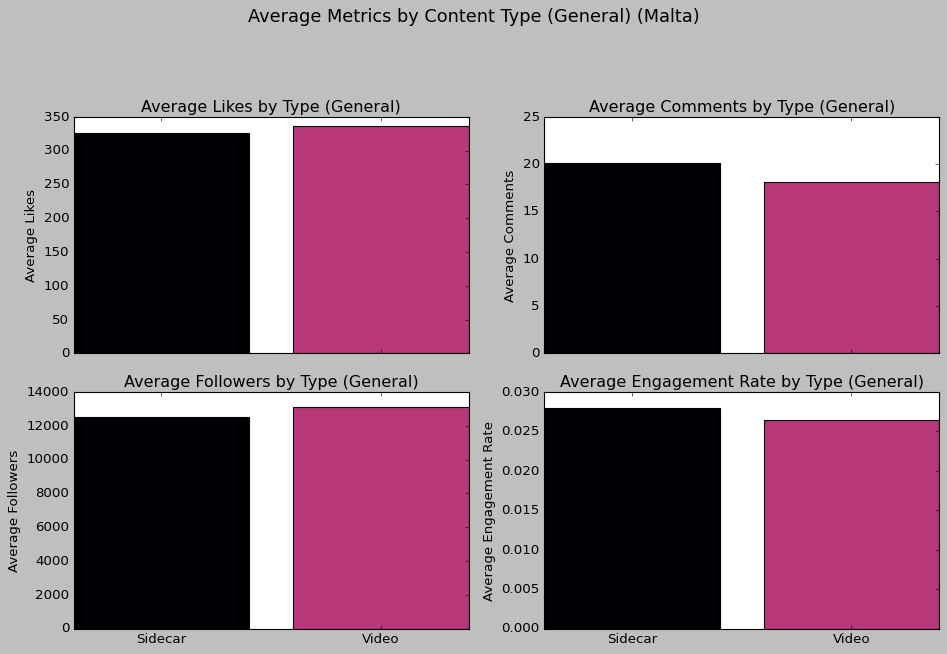

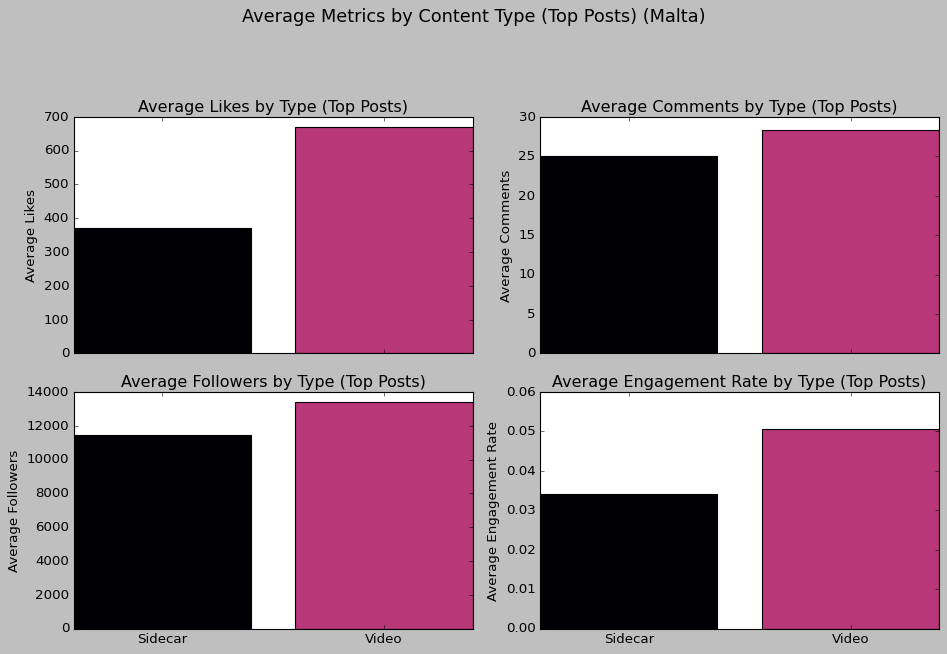

In [337]:
metrics = ['likesCount', 'commentsCount', 'user_followersCount', 'log_engagement_rate']
metric_labels = ['Likes', 'Comments', 'Followers', 'Engagement Rate']

# Get unique content types
content_types = df_era['type'].unique()
num_types = len(content_types)

# Colours
cmap = plt.get_cmap('magma')
colors = [cmap(i / num_types) for i in range(num_types)]

# Figure 1: General Average by Metric
fig_general, axes_general = plt.subplots(nrows=2, ncols=2, figsize=(12, 8), sharex=True)
axes_general = axes_general.flatten()

for i, metric in enumerate(metrics):
    ax = axes_general[i]
    avg_metric_by_type = df_era.groupby('type')[metric].mean()
    ax.bar(avg_metric_by_type.index, avg_metric_by_type.values, color=colors)
    ax.set_ylabel(f'Average {metric_labels[i]}')
    ax.set_title(f'Average {metric_labels[i]} by Type (General)')

fig_general.suptitle('Average Metrics by Content Type (General) (Malta)', fontsize=16, y=1.02)
fig_general.tight_layout(rect=[0, 0, 1, 0.95])
plt.show()

# Figure 2: Top Posts Average by Metric 
fig_top, axes_top = plt.subplots(nrows=2, ncols=2, figsize=(12, 8), sharex=True)
axes_top = axes_top.flatten()

for i, metric in enumerate(metrics):
    ax = axes_top[i]
    avg_metric_by_type_top = top_df.groupby('type')[metric].mean()
    ax.bar(avg_metric_by_type_top.index, avg_metric_by_type_top.values, color=colors)
    ax.set_ylabel(f'Average {metric_labels[i]}')
    ax.set_title(f'Average {metric_labels[i]} by Type (Top Posts)')
fig_top.suptitle('Average Metrics by Content Type (Top Posts) (Malta)', fontsize=16, y=1.02)
fig_top.tight_layout(rect=[0, 0, 1, 0.95])
plt.show()


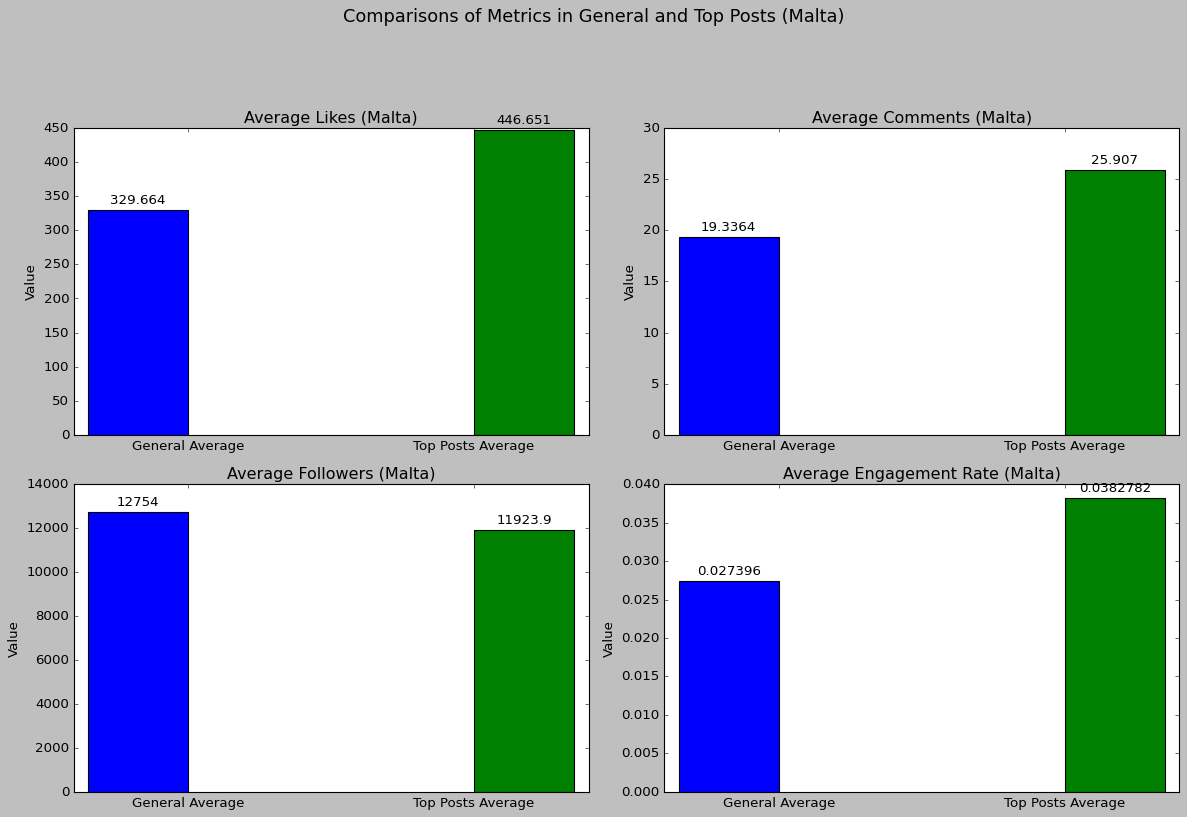

In [338]:
# Compare General and Top results

metrics = ['Likes', 'Comments', 'Followers', 'Engagement Rate']
avg_data = [avg_likes, avg_comments, avg_followers, avg_er]
avg_data_top = [avg_likes_top, avg_comments_top, avg_followers_top, avg_er_top]
labels = ['General Average', 'Top Posts Average']

fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(15, 10))
axes = axes.flatten()  

for i, metric in enumerate(metrics):
    ax = axes[i]
    x = np.arange(2)
    width = 0.35

    rects1 = ax.bar(x[0] - width/2, avg_data[i], width, label=labels[0])
    rects2 = ax.bar(x[1] + width/2, avg_data_top[i], width, label=labels[1])

    ax.set_ylabel('Value')
    ax.set_title(f'Average {metric} (Malta)')
    ax.set_xticks(x)
    ax.set_xticklabels(labels)
    ax.bar_label(rects1, padding=3)
    ax.bar_label(rects2, padding=3)

fig.suptitle('Comparisons of Metrics in General and Top Posts (Malta)', fontsize=16, y=1.02)
fig.tight_layout(rect=[0, 0, 1, 0.95])
plt.show()

## Thematic Content Analysis

note: df['caption'] includes the hashtags as well

In [339]:
#Analyzing Text Content - caption

text = " ".join(str(i) for i in top_df.caption)

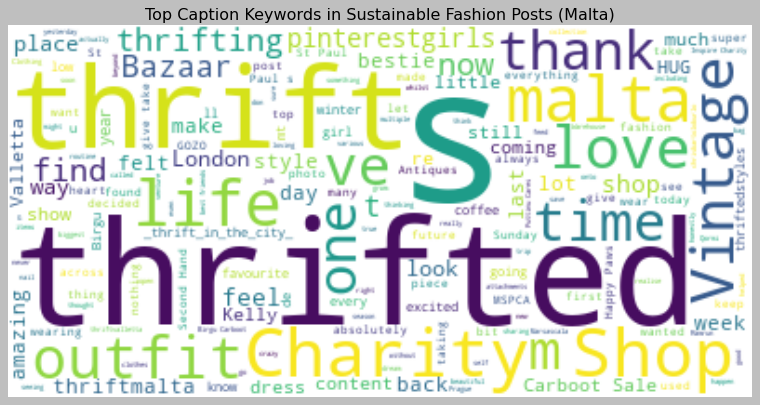

In [340]:
# Visualise top caption keywords using WordCloud

stopwords = set(STOPWORDS)
wordcloud = WordCloud(stopwords=stopwords, background_color="white").generate(text)
plt.style.use('classic')
plt.figure( figsize=(12,10))
plt.imshow(wordcloud, interpolation='bilinear')
plt.title("Top Caption Keywords in Sustainable Fashion Posts (Malta)")
plt.axis("off")
plt.show()

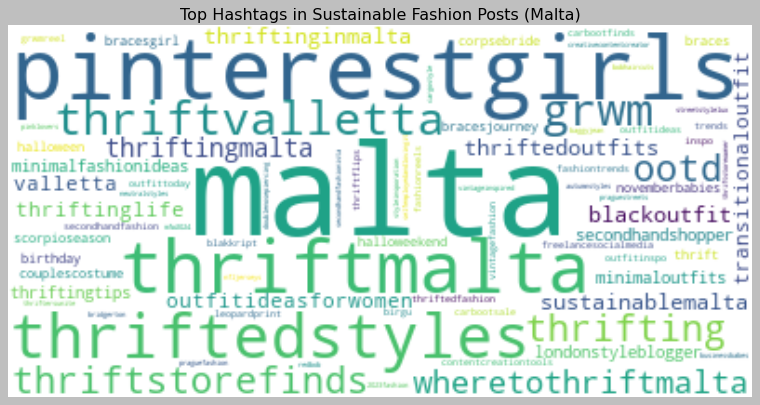

In [341]:
# Visualise top hashtags using WordCloud

hashtags = " ".join(str(i) for i in top_df.hashtags)

#Analyzing Text Content - caption
stopwords = set(STOPWORDS)
wordcloud = WordCloud(stopwords=stopwords, background_color="white").generate(hashtags)
plt.style.use('classic')
plt.figure( figsize=(12,10))
plt.imshow(wordcloud, interpolation='bilinear')
plt.title("Top Hashtags in Sustainable Fashion Posts (Malta)")
plt.axis("off")
plt.show()

In [342]:
# Vectorize
vectorizer = TfidfVectorizer(stop_words='english', max_features=100)
X = vectorizer.fit_transform(top_df['caption'])

# Top keywords by TF-IDF average
tfidf_df = pd.DataFrame(X.toarray(), columns=vectorizer.get_feature_names_out())
top_keywords = tfidf_df.mean().sort_values(ascending=False).head(10)
top_keywords

thrifted          0.119454
life              0.076748
thrift            0.063856
like              0.060617
time              0.059641
malta             0.058755
love              0.058594
just              0.057310
thrifting         0.053049
pinterestgirls    0.050447
dtype: float64

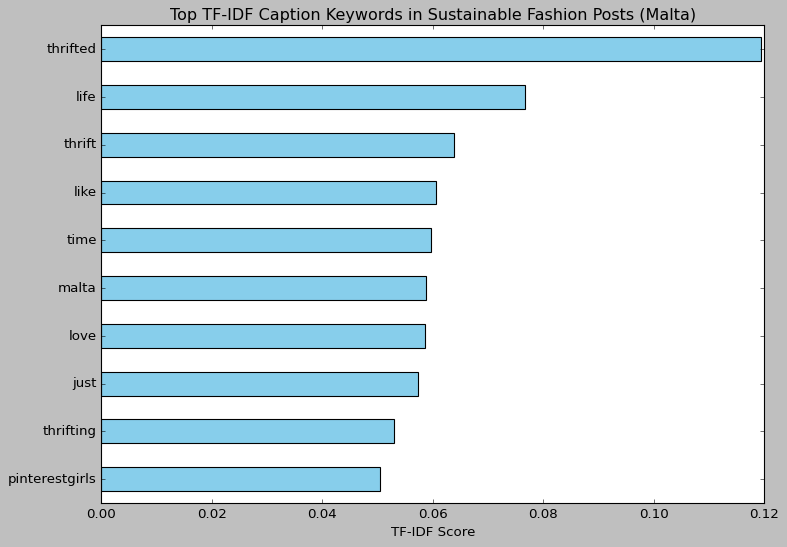

In [343]:
top_keywords.plot(kind='barh', figsize=(10, 7), color='skyblue')
plt.gca().invert_yaxis()
plt.title("Top TF-IDF Caption Keywords in Sustainable Fashion Posts (Malta)")
plt.xlabel("TF-IDF Score")
plt.tight_layout()
plt.show()

In [344]:
# TF-IDF for Hashtags
# Vectorize
X_hashtags = vectorizer.fit_transform(df['hashtags'])

# Top keywords by TF-IDF average
tfidf_df = pd.DataFrame(X_hashtags.toarray(), columns=vectorizer.get_feature_names_out())
top_hashtags = tfidf_df.mean().sort_values(ascending=False).head(10)
top_hashtags

malta                0.172059
thriftmalta          0.135928
valletta             0.070340
thriftvalletta       0.060241
pinterestgirls       0.040415
outfitinspiration    0.039111
pinterestsummer      0.038488
thriftedstyles       0.037064
outfitinspo          0.033312
streetstyle          0.032613
dtype: float64

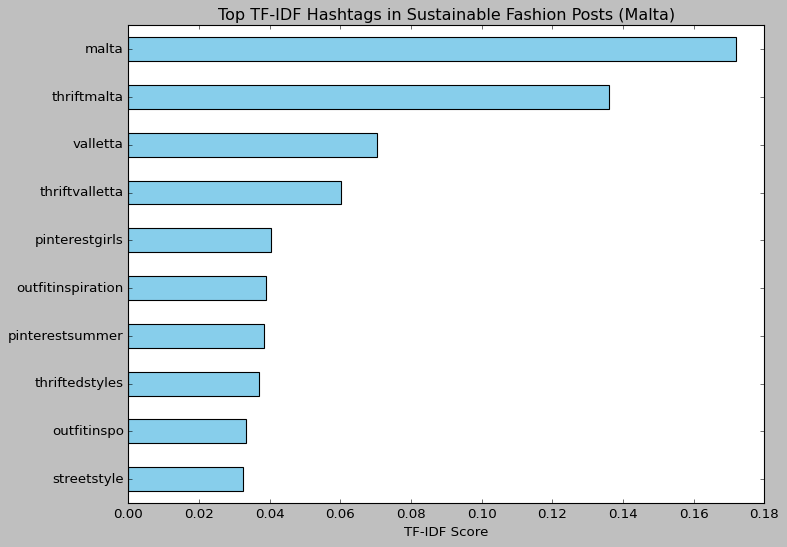

In [345]:
top_hashtags.plot(kind='barh', figsize=(10, 7), color='skyblue')
plt.gca().invert_yaxis()
plt.title("Top TF-IDF Hashtags in Sustainable Fashion Posts (Malta)")
plt.xlabel("TF-IDF Score")
plt.tight_layout()
plt.show()

Recommendation: implement NLP for deeper thematic analysis and group posts by themes

## Correlation Analysis

In [346]:
# Correlation analysis on each engagment metrics
# cm_era = df_era[['likesCount', 'commentsCount', 'user_followersCount', 'log_engagement_rate']].corr()
# print(cm_era)

In [347]:
# Correlation analysis on each engagment metrics (Top)
# cm_era_top = top_df[['likesCount', 'commentsCount', 'user_followersCount', 'log_engagement_rate']].corr()
# print(cm_era_top)

In [348]:
# Correlation analysis on other post factors
cm_era_var = df_era[['hashtagsCount', 'captionWordCount', 'isSponsored_encoded', 'type_encoded', 'has_music', 'original_audio', 'log_engagement_rate']].corr()
print(cm_era_var)

                     hashtagsCount  captionWordCount  isSponsored_encoded  \
hashtagsCount             1.000000          0.131407                  NaN   
captionWordCount          0.131407          1.000000                  NaN   
isSponsored_encoded            NaN               NaN                  NaN   
type_encoded              0.095140          0.260876                  NaN   
has_music                 0.099450          0.271686                  NaN   
original_audio            0.010468          0.176984                  NaN   
log_engagement_rate      -0.131709          0.182732                  NaN   

                     type_encoded  has_music  original_audio  \
hashtagsCount            0.095140   0.099450        0.010468   
captionWordCount         0.260876   0.271686        0.176984   
isSponsored_encoded           NaN        NaN             NaN   
type_encoded             1.000000   0.980838        0.445254   
has_music                0.980838   1.000000        0.453952   

In [349]:
cm_era_var_top = top_df[['hashtagsCount', 'captionWordCount', 'isSponsored_encoded', 'type_encoded', 'has_music', 'original_audio', 'log_engagement_rate']].corr()
print(cm_era_var_top)

                     hashtagsCount  captionWordCount  isSponsored_encoded  \
hashtagsCount             1.000000          0.267124                  NaN   
captionWordCount          0.267124          1.000000                  NaN   
isSponsored_encoded            NaN               NaN                  NaN   
type_encoded              0.128138          0.294389                  NaN   
has_music                 0.128138          0.294389                  NaN   
original_audio           -0.307968          0.083579                  NaN   
log_engagement_rate       0.006386          0.498061                  NaN   

                     type_encoded  has_music  original_audio  \
hashtagsCount            0.128138   0.128138       -0.307968   
captionWordCount         0.294389   0.294389        0.083579   
isSponsored_encoded           NaN        NaN             NaN   
type_encoded             1.000000   1.000000        0.546231   
has_music                1.000000   1.000000        0.546231   

Note that isSponsored is NaN because there is lack of variety in the dataset as mentioned above.

### Data Visualisation

In [350]:
# sns.heatmap(cm_era, annot=True, cmap="coolwarm")
# plt.title("Correlation Matrix (Malta)")
# plt.show()

In [351]:
# sns.heatmap(cm_era_top, annot=True, cmap="coolwarm")
# plt.title("Correlation Matrix of Top Posts (Malta)")
# plt.show()

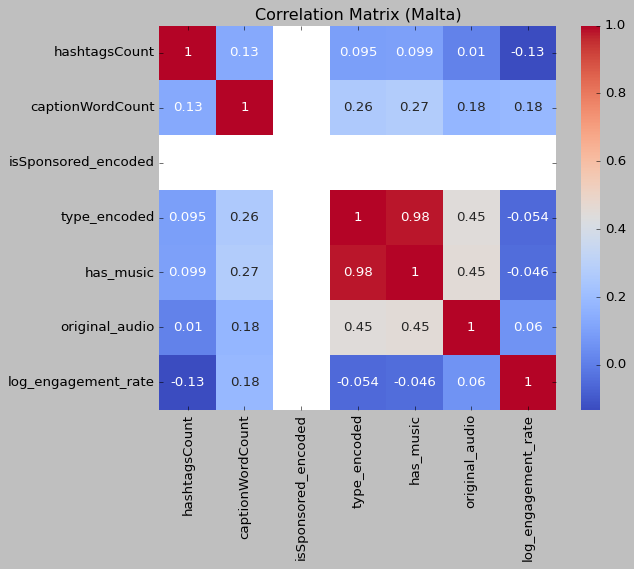

In [352]:
sns.heatmap(cm_era_var, annot=True, cmap="coolwarm")
plt.title("Correlation Matrix (Malta)")
plt.show()

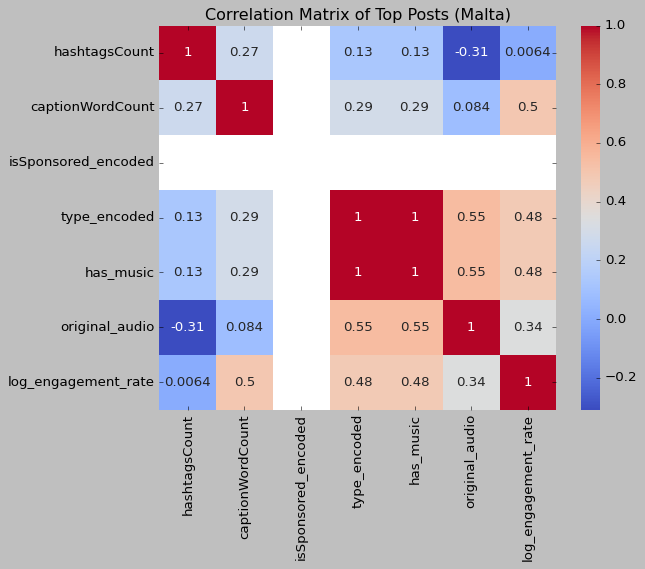

In [353]:
sns.heatmap(cm_era_var_top, annot=True, cmap="coolwarm")
plt.title("Correlation Matrix of Top Posts (Malta)")
plt.show()

## Regression Analysis

In [354]:
# OLS Regression Results

X = top_df[['hashtagsCount', 'captionWordCount', 'isSponsored_encoded', 'type_encoded', 'has_music', 'original_audio',]]
y = top_df['log_engagement_rate']
X = sm.add_constant(X) # add intercept
model = sm.OLS(y, X).fit()
print(model.summary())

                             OLS Regression Results                            
Dep. Variable:     log_engagement_rate   R-squared:                       0.400
Model:                             OLS   Adj. R-squared:                  0.337
Method:                  Least Squares   F-statistic:                     6.327
Date:                 Tue, 20 May 2025   Prob (F-statistic):           0.000528
Time:                         20:08:29   Log-Likelihood:                 130.95
No. Observations:                   43   AIC:                            -251.9
Df Residuals:                       38   BIC:                            -243.1
Df Model:                            4                                         
Covariance Type:             nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                   

The model yielded a medium R-squared value of 0.400 and Adjusted R-squared of 0.337. This means 33.7% of the variation in engagement rate was explained. This suggests that many other factors likely influence the effectiveness of UGC and the engagemennt rate. Following the Terms-Of-Service (TOS) of Instagram and ensuring ethical data scraping, the data collected was limited. Key Performance Indicators (KPIs) such as shares and saves were absent which are also significant indicators. The overall model is statistically significant at F-statistic p = 0.000528 .

Two values emerged as significant predictors, following the rule p < 0.05:
Longer captions received higher engagement and resulted to the coefficient of 0.0001 and p value of 0.003.
Videos format received higher engagemment and resulted to the coefficient of 0.0133 and p-value of  0.00.
Hashtag count, sponsorship, music factors were not significant, likely due to a small sample size, given that the top posts in the Maltese dataset contained only 43 posts.

### RQ2: How effective is current UGC in Sustainable Fashion?
- Overall the average engageent rate is 2.79%, and 3.91% for the top posts

### RQ3: Which guidelines should be followed to create effective UGC?
- Maltese UGC in sustainable fashion should consider longer captions and video formats for greater engagement.